# Credit Card Users Churn Prediction

## Problem Statement

A bank recently saw a steep decline in the number of users of their credit card, credit cards are a good source of income for banks because of different kinds of fees charged by the banks like annual fees, balance transfer fees, and cash advance fees, late payment fees, foreign transaction fees, and others. Some fees are charged to every user irrespective of usage, while others are charged under specified circumstances.

Customers’ leaving credit cards services would lead bank to loss, so the bank wants to analyze the data of customers and identify the customers who will leave their credit card services and reason for same – so that bank could improve upon those areas

You as a Data scientist at the bank, you need to come up with a classification model that will help the bank improve its services so that customers do not renounce their credit cards

**You need to identify best possible model that will give the required performance**


## Data Description
* CLIENTNUM: Client number. Unique identifier for the customer holding the account 
* Attrition_Flag: Internal event (customer activity) variable - if the account is closed then "Attrited Customer" else "Existing Customer" 
* Customer_Age: Age in Years
* Gender: Gender of the account holder
* Dependent_count: Number of dependents 
* Education_Level: Educational Qualification of the account holder - Graduate, High School, Unknown, Uneducated, College(refers to college student), Post-Graduate, Doctorate
* Marital_Status: Marital Status of the account holder
* Income_Category: Annual Income Category of the account holder
* Card_Category: Type of Card
* Months_on_book: Period of relationship with the bank (in months)
* Total_Relationship_Count: Total no. of products held by the customer
* Months_Inactive_12_mon: No. of months inactive in the last 12 months
* Contacts_Count_12_mon: No. of Contacts in the last 12 months
* Credit_Limit: Credit Limit on the Credit Card
* Total_Revolving_Bal: Total Revolving Balance on the Credit Card
* Avg_Open_To_Buy: Open to Buy Credit Line (Average of last 12 months)
* Total_Amt_Chng_Q4_Q1: Change in Transaction Amount (Q4 over Q1)
* Total_Trans_Amt: Total Transaction Amount (Last 12 months)
* Total_Trans_Ct: Total Transaction Count (Last 12 months)
* Total_Ct_Chng_Q4_Q1: Change in Transaction Count (Q4 over Q1)
* Avg_Utilization_Ratio: Average Card Utilization Ratio


#### What Is a Revolving Balance?

* If we don't pay the balance of the revolving credit account in full every month, the unpaid portion carries over to the next month. That's called a revolving balance


#### What is the Average Open to buy?

* 'Open to Buy' means the amount left on your credit card to use. Now, this column represents the average of this value for the last 12 months.

#### What is the Average utilization Ratio?

* The Avg_Utilization_Ratio represents how much of the available credit the customer spent. This is useful for calculating credit scores.


#### Relation b/w Avg_Open_To_Buy, Credit_Limit and Avg_Utilization_Ratio:

* ( Avg_Open_To_Buy / Credit_Limit ) + Avg_Utilization_Ratio = 1

### Importing Libraries

In [471]:
# Libraries to help with reading and manipulating data
import pandas as pd
import numpy as np

# Libaries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
# Removes the limit for the number of displayed columns
pd.set_option("display.max_columns", None)
# Sets the limit for the number of displayed rows
pd.set_option("display.max_rows", 200)
# setting the precision of floating numbers to 5 decimal points
pd.set_option("display.float_format", lambda x: "%.5f" % x)
# To tune model, get different metric scores, and split data
from sklearn.metrics import (
    f1_score,
    accuracy_score,
    recall_score,
    precision_score,
    confusion_matrix,
    log_loss,
    roc_auc_score,
    classification_report,
    precision_recall_curve
)
from sklearn import metrics
from sklearn.pipeline import Pipeline, make_pipeline

from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score

# To be used for data scaling and one hot encoding
from sklearn.preprocessing import StandardScaler, MinMaxScaler, OneHotEncoder

# To impute missing values
from sklearn.impute import SimpleImputer

# To help with model building
from sklearn.linear_model import LogisticRegression
#to build SVM model
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV, learning_curve
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import classification_report

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_predict
from sklearn.preprocessing import LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.ensemble import BaggingClassifier

from tqdm import tqdm
from sklearn.cluster import KMeans

# To supress warnings
import warnings

warnings.filterwarnings("ignore")

### Importing Data

In [472]:
# loading the dataset and looking at it
df_data = pd.read_csv("BankChurners.csv")
df_data.head()

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,5,1,3,12691.00000,777,11914.00000,1.33500,1144,42,1.62500,0.06100,0.00009,0.99991
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,6,1,2,8256.00000,864,7392.00000,1.54100,1291,33,3.71400,0.10500,0.00006,0.99994
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,4,1,0,3418.00000,0,3418.00000,2.59400,1887,20,2.33300,0.00000,0.00002,0.99998
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,3,4,1,3313.00000,2517,796.00000,1.40500,1171,20,2.33300,0.76000,0.00013,0.99987
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,5,1,0,4716.00000,0,4716.00000,2.17500,816,28,2.50000,0.00000,0.00002,0.99998


### Data Overview

In [375]:
# making a copy of the data
df_churn = df_data.copy()

In [376]:
# Taking a look at the dataset info and properties 
df_churn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 23 columns):
 #   Column                                                                                                                              Non-Null Count  Dtype  
---  ------                                                                                                                              --------------  -----  
 0   CLIENTNUM                                                                                                                           10127 non-null  int64  
 1   Attrition_Flag                                                                                                                      10127 non-null  object 
 2   Customer_Age                                                                                                                        10127 non-null  int64  
 3   Gender                                                                           

In [377]:
# Renaming the Naive_Bayes_Classifier_Attritions to reduce the text lenght
df_churn.rename(columns={"Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1" : "Naive_Bayes_1", "Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2" : "Naive_Bayes_2"}, inplace=True)


In [378]:
# Taking a look at the top data 
df_churn.head()

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_1,Naive_Bayes_2
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,5,1,3,12691.00000,777,11914.00000,1.33500,1144,42,1.62500,0.06100,0.00009,0.99991
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,6,1,2,8256.00000,864,7392.00000,1.54100,1291,33,3.71400,0.10500,0.00006,0.99994
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,4,1,0,3418.00000,0,3418.00000,2.59400,1887,20,2.33300,0.00000,0.00002,0.99998
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,3,4,1,3313.00000,2517,796.00000,1.40500,1171,20,2.33300,0.76000,0.00013,0.99987
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,5,1,0,4716.00000,0,4716.00000,2.17500,816,28,2.50000,0.00000,0.00002,0.99998


In [379]:
# Taking a look at the bottom data 
df_churn.tail()

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_1,Naive_Bayes_2
10122,772366833,Existing Customer,50,M,2,Graduate,Single,$40K - $60K,Blue,40,3,2,3,4003.00000,1851,2152.00000,0.70300,15476,117,0.85700,0.46200,0.00019,0.99981
10123,710638233,Attrited Customer,41,M,2,Unknown,Divorced,$40K - $60K,Blue,25,4,2,3,4277.00000,2186,2091.00000,0.80400,8764,69,0.68300,0.51100,0.99527,0.00473
10124,716506083,Attrited Customer,44,F,1,High School,Married,Less than $40K,Blue,36,5,3,4,5409.00000,0,5409.00000,0.81900,10291,60,0.81800,0.00000,0.99788,0.00212
10125,717406983,Attrited Customer,30,M,2,Graduate,Unknown,$40K - $60K,Blue,36,4,3,3,5281.00000,0,5281.00000,0.53500,8395,62,0.72200,0.00000,0.99671,0.00329
10126,714337233,Attrited Customer,43,F,2,Graduate,Married,Less than $40K,Silver,25,6,2,4,10388.00000,1961,8427.00000,0.70300,10294,61,0.64900,0.18900,0.99662,0.00338


In [380]:
# Taking a look at the dataset info and properties 
df_churn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   CLIENTNUM                 10127 non-null  int64  
 1   Attrition_Flag            10127 non-null  object 
 2   Customer_Age              10127 non-null  int64  
 3   Gender                    10127 non-null  object 
 4   Dependent_count           10127 non-null  int64  
 5   Education_Level           10127 non-null  object 
 6   Marital_Status            10127 non-null  object 
 7   Income_Category           10127 non-null  object 
 8   Card_Category             10127 non-null  object 
 9   Months_on_book            10127 non-null  int64  
 10  Total_Relationship_Count  10127 non-null  int64  
 11  Months_Inactive_12_mon    10127 non-null  int64  
 12  Contacts_Count_12_mon     10127 non-null  int64  
 13  Credit_Limit              10127 non-null  float64
 14  Total_

* 6 columns are of object type rest all are numerical.

In [381]:
# Getting the shape the data
df_churn.shape

(10127, 23)

* The dataset has 10127 rows and 23 columns 

In [382]:
# Checking for duplicated values in the data
df_churn.duplicated().sum()

0

* No duplicated values in the dataset.

In [383]:
# checking for missing values in the data and getting the percentages
pct = (df_churn.isna().sum() / df_churn.value_counts().sum()) * 100
round(pct, 2)

CLIENTNUM                  0.00000
Attrition_Flag             0.00000
Customer_Age               0.00000
Gender                     0.00000
Dependent_count            0.00000
Education_Level            0.00000
Marital_Status             0.00000
Income_Category            0.00000
Card_Category              0.00000
Months_on_book             0.00000
Total_Relationship_Count   0.00000
Months_Inactive_12_mon     0.00000
Contacts_Count_12_mon      0.00000
Credit_Limit               0.00000
Total_Revolving_Bal        0.00000
Avg_Open_To_Buy            0.00000
Total_Amt_Chng_Q4_Q1       0.00000
Total_Trans_Amt            0.00000
Total_Trans_Ct             0.00000
Total_Ct_Chng_Q4_Q1        0.00000
Avg_Utilization_Ratio      0.00000
Naive_Bayes_1              0.00000
Naive_Bayes_2              0.00000
dtype: float64

* No missing values in the dataset.

In [384]:
# Taking a look at the statistical summary of the numerical columns in the data
df_churn.describe().T

,count,mean,std,min,25%,50%,75%,max
CLIENTNUM,10127.00000,739177606.33366,36903783.45023,708082083.00000,713036770.50000,717926358.00000,773143533.00000,828343083.00000
Customer_Age,10127.00000,46.32596,8.01681,26.00000,41.00000,46.00000,52.00000,73.00000
Dependent_count,10127.00000,2.34620,1.29891,0.00000,1.00000,2.00000,3.00000,5.00000
Months_on_book,10127.00000,35.92841,7.98642,13.00000,31.00000,36.00000,40.00000,56.00000
Total_Relationship_Count,10127.00000,3.81258,1.55441,1.00000,3.00000,4.00000,5.00000,6.00000
Months_Inactive_12_mon,10127.00000,2.34117,1.01062,0.00000,2.00000,2.00000,3.00000,6.00000
Contacts_Count_12_mon,10127.00000,2.45532,1.10623,0.00000,2.00000,2.00000,3.00000,6.00000
Credit_Limit,10127.00000,8631.95370,9088.77665,1438.30000,2555.00000,4549.00000,11067.50000,34516.00000
Total_Revolving_Bal,10127.00000,1162.81406,814.98734,0.00000,359.00000,1276.00000,1784.00000,2517.00000
Avg_Open_To_Buy,10127.00000,7469.13964,9090.68532,3.00000,1324.50000,3474.00000,9859.00000,34516.00000


#### Observations:
* CLIENTNUM: It is a unique identifier for customers and can be dropped as it wouldn't add any information to our analysis.
* Customer_Age: Average age of customers is 46 years, age of customers has a wide range from 26 to 73 years.
* Dependent_count: On average the customers in the data have 2 dependents and a maximum of 5 dependents.
* Months_on_book: All the customers of the bank have at least been with them for a year and 50% of the customers for at least 3 years.
* Total_Relationship_Count: All customers use at least one product of the bank, whereas 75% of customers use 5 or fewer products of the bank.
* Months_Inactive_12_mon: On average customers were inactive for two months in the past 12 months - this shows that the bank customers are active in transactions or usage of cards it would be interesting to see if high inactivity leads to churning of a customer.
* Contacts_Count_12_mon: On average bank and customers interacted twice in the past 12 months.
* Credit_Limit: There's a huge difference between the third quartile and maximum value. The range of credit limit is very wide from 1438 to 34516, customers with high credit limit might be outliers.
* Total_Revolving_Bal: Average revolving balance of customers is 1162, there's not much difference in the third quartile and maximum value.
* Avg_Open_To_Buy: Average amount that goes unused by the customers is 7469, the range is very wide for this variable and the extreme values(min and max) might be outliers.
* Total_Amt_Chng_Q4_Q1: For 75% of the customers the transaction amount in Q4 was less than the transaction amount in Q1 (as value is equal to ~0.9).
* Total_Trans_Amt: Average transaction amount of last 12 months is 4404, some customers spent as little as 510 while some customers made the transaction of more than 18k.
* Total_Trans_Ct: On average customers made 64 or fewer transactions while 75% of the customers made 81 transactions.
* Total_Ct_Chng_Q4_Q1: For 75% of the customers the number of transactions in Q4 was less than the transactions made in Q1.
* Avg_Utilization_Ratio: On average customers used ~27% of the available credit amount of their card, with 75% of the customers utilizing 50% or less of their available credit amount.
* Naive_Bayes_1 and 2 are not needed at this point so can be dropped as we may only need them for comparison.

In [385]:
# Taking a look at the statistical summary of the non-numerical columns in the data
df_churn.describe(include=["object"]).T

,count,unique,top,freq
Attrition_Flag,10127,2,Existing Customer,8500
Gender,10127,2,F,5358
Education_Level,10127,7,Graduate,3128
Marital_Status,10127,4,Married,4687
Income_Category,10127,6,Less than $40K,3561
Card_Category,10127,4,Blue,9436


In [386]:
# Taking a look at the statistical summary of the non-numerical columns, the unique vaules, and the counts 
for i in df_churn.describe(include=["object"]).columns:
    print("Unique values in", i, "are :")
    print(df_churn[i].value_counts())
    print("*" * 50)

Unique values in Attrition_Flag are :
Existing Customer    8500
Attrited Customer    1627
Name: Attrition_Flag, dtype: int64
**************************************************
Unique values in Gender are :
F    5358
M    4769
Name: Gender, dtype: int64
**************************************************
Unique values in Education_Level are :
Graduate         3128
High School      2013
Unknown          1519
Uneducated       1487
College          1013
Post-Graduate     516
Doctorate         451
Name: Education_Level, dtype: int64
**************************************************
Unique values in Marital_Status are :
Married     4687
Single      3943
Unknown      749
Divorced     748
Name: Marital_Status, dtype: int64
**************************************************
Unique values in Income_Category are :
Less than $40K    3561
$40K - $60K       1790
$80K - $120K      1535
$60K - $80K       1402
Unknown           1112
$120K +            727
Name: Income_Category, dtype: int64
***********

**Observations**
* Most of the records are for existing customers.
* More female bank customers than male. 
* More educated(Graduate, High School, College, Post-Graduate, Doctorate) customers than unneducated.
* More married customers than single.
* Most customers lie in the income group of less than $40k.
* Most customers have a blue card
* We have "Unknown" values in Educational_Level, Marital_Status, and Income_Category 

## Data Pre-processing

As we have observed, we have "Unknown" values in Educational_Level, Marital_Status, and Income_Category. 
We need to change these "Unknown" values to "Nan" values, makes it easier to work with, get the percentages and then, take our decision on what to do to them.

In [387]:
# changing the unknown values to nan
df_churn.replace(r"Unknown", np.nan, inplace=True)

In [388]:
# checking for missing values in the data and getting the percentages
pct = (df_churn.isna().sum() / df_churn.value_counts().sum()) * 100
round(pct, 2)

CLIENTNUM                   0.00000
Attrition_Flag              0.00000
Customer_Age                0.00000
Gender                      0.00000
Dependent_count             0.00000
Education_Level            21.45000
Marital_Status             10.58000
Income_Category            15.70000
Card_Category               0.00000
Months_on_book              0.00000
Total_Relationship_Count    0.00000
Months_Inactive_12_mon      0.00000
Contacts_Count_12_mon       0.00000
Credit_Limit                0.00000
Total_Revolving_Bal         0.00000
Avg_Open_To_Buy             0.00000
Total_Amt_Chng_Q4_Q1        0.00000
Total_Trans_Amt             0.00000
Total_Trans_Ct              0.00000
Total_Ct_Chng_Q4_Q1         0.00000
Avg_Utilization_Ratio       0.00000
Naive_Bayes_1               0.00000
Naive_Bayes_2               0.00000
dtype: float64

Now we have Nan values:
* Educational_Level = ~21%
* Marital_Status = ~11%
* Income_Category = ~16%
The percentages are above 10% which may have significant effects on our dataset, so we cannot drop them.

In [389]:
# Dropping the following columns CLIENTNUM, Naive_Bayes_1, and Naive_Bayes_2
df_churn.drop(columns=["CLIENTNUM", "Naive_Bayes_1", "Naive_Bayes_2"],inplace=True)

In [390]:
# For easy modelling, we encode Existing and Attrited customers to 0 and 1 respectively, for analysis.
df_churn["Attrition_Flag"].replace("Existing Customer", 0, inplace=True)
df_churn["Attrition_Flag"].replace("Attrited Customer", 1, inplace=True)

In [391]:
df_churn.head()

,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,0,45,M,3,High School,Married,$60K - $80K,Blue,39,5,1,3,12691.00000,777,11914.00000,1.33500,1144,42,1.62500,0.06100
1,0,49,F,5,Graduate,Single,Less than $40K,Blue,44,6,1,2,8256.00000,864,7392.00000,1.54100,1291,33,3.71400,0.10500
2,0,51,M,3,Graduate,Married,$80K - $120K,Blue,36,4,1,0,3418.00000,0,3418.00000,2.59400,1887,20,2.33300,0.00000
3,0,40,F,4,High School,NaN,Less than $40K,Blue,34,3,4,1,3313.00000,2517,796.00000,1.40500,1171,20,2.33300,0.76000
4,0,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,5,1,0,4716.00000,0,4716.00000,2.17500,816,28,2.50000,0.00000


## Exploratory Data Analysis (EDA)


### Univariate Analysis

Exploring the variables/columns in some more depth by observing their distributions

In [392]:
# Columns to look into
num_cols=["Attrition_Flag", 'Customer_Age', 'Months_on_book', 'Credit_Limit', 'Total_Revolving_Bal','Avg_Open_To_Buy','Total_Trans_Ct','Total_Amt_Chng_Q4_Q1','Total_Trans_Amt','Total_Ct_Chng_Q4_Q1','Avg_Utilization_Ratio']

### Attrition_Flag

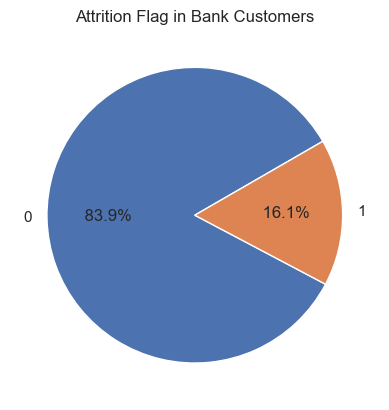

In [393]:
#Calculate percentage of attrited customers
att_count = df_churn.Attrition_Flag.value_counts().reset_index()
att_count.columns=["Attrition_Flag", "Counts"]

fig, ax = plt.subplots()
ax.pie(att_count.Counts, labels = att_count.Attrition_Flag, autopct ='% .1f%%', startangle = 30)
ax.set_title('Attrition Flag in Bank Customers')
plt.show();

* 0 = Existing customers contain 84% of the dataset.
* 1 = Attrited customers contain 16% of the dataset.

### Customer_Age

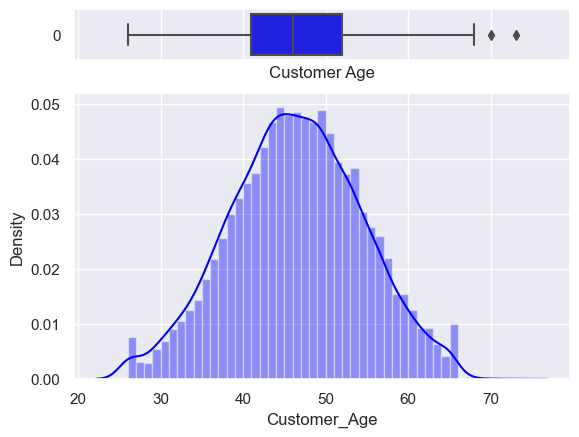

In [394]:
# this will cut the window in 2 parts
f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (.15, .85)})
sns.set(style="darkgrid")
# Add a graph in each part
sns.boxplot(df_churn["Customer_Age"], ax=ax_box, orient="h", color="blue")
sns.distplot(df_churn["Customer_Age"], ax=ax_hist, color="blue")
ax_box.set(xlabel='Customer Age')
plt.show();

* The distribution of Customer_Age is normally distributed with mean and median at 46 years.
* From the boxplot, we can see that there are a few outliers.

### Months_on_book

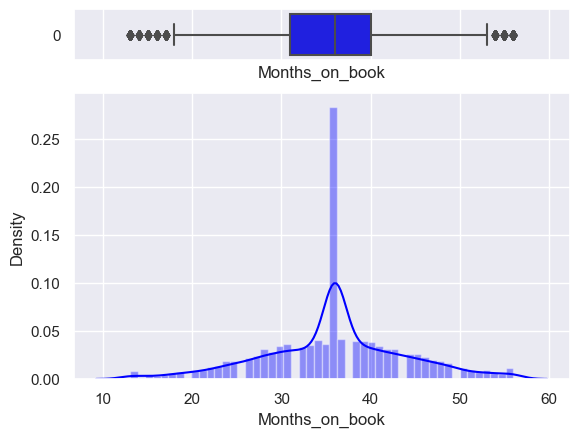

In [395]:
# this will cut the window in 2 parts
f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (.15, .85)})
# Add a graph in each part
sns.boxplot(df_churn["Months_on_book"], ax=ax_box, orient="h", color="blue")
sns.distplot(df_churn["Months_on_book"], ax=ax_hist, color="blue")
ax_box.set(xlabel='Months_on_book')
plt.show();

* Most customers are with the bank between the range of 30 - 40 months, which is approximately for 3 years.
* From the boxplot, we can see that there are outliers on both sides of the whiskers.

### Credit Limit

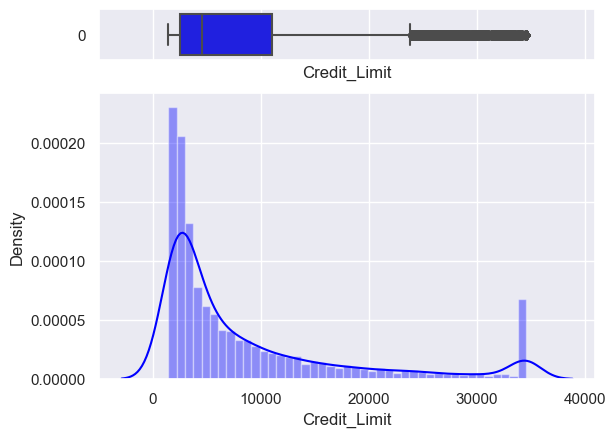

In [396]:
# this will cut the window in 2 parts
f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (.15, .85)})
# Add a graph in each part
sns.boxplot(df_churn["Credit_Limit"], ax=ax_box, orient="h", color="blue")
sns.distplot(df_churn["Credit_Limit"], ax=ax_hist, color="blue")
ax_box.set(xlabel='Credit_Limit')
plt.show();

* The distribution of the Credit_Limit is skewed to the right.
* There are quite a few customers with a maximum Credit Limit of 35000.
* 50% of the customers of the bank have a credit limit of less than <5000.

### Total_Revolving_Bal

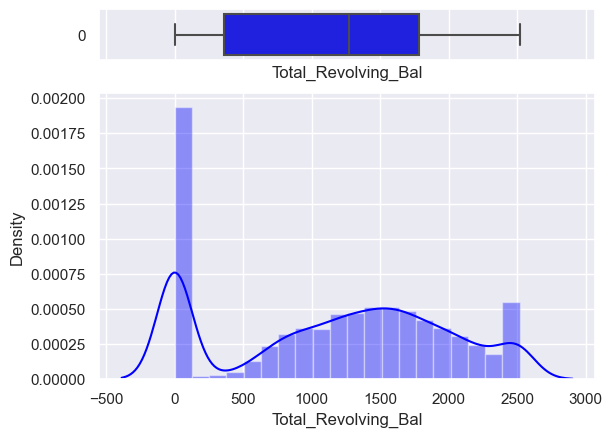

In [397]:
# this will cut the window in 2 parts
f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (.15, .85)})
# Add a graph in each part
sns.boxplot(df_churn["Total_Revolving_Bal"], ax=ax_box, orient="h", color="blue")
sns.distplot(df_churn["Total_Revolving_Bal"], ax=ax_hist, color="blue")
ax_box.set(xlabel='Total_Revolving_Bal')
plt.show();

* Most customers pay the complete dues of credit card and have 0 revolving balance.
* There are quite a few customers with a revolving balance of 2500.

### Avg_Open_To_Buy

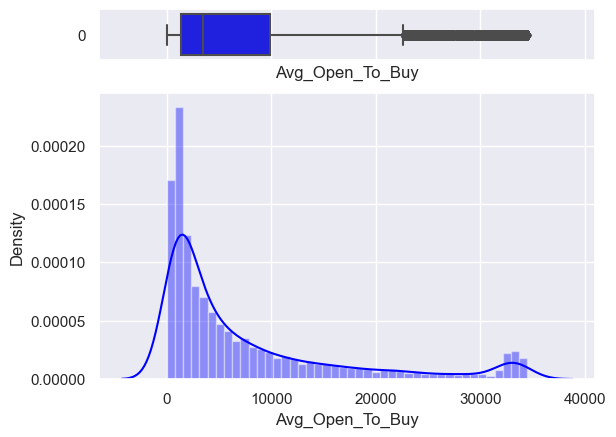

In [398]:
# this will cut the window in 2 parts
f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (.15, .85)})
# Add a graph in each part
sns.boxplot(df_churn["Avg_Open_To_Buy"], ax=ax_box, orient="h", color="blue")
sns.distplot(df_churn["Avg_Open_To_Buy"], ax=ax_hist, color="blue")
ax_box.set(xlabel='Avg_Open_To_Buy')
plt.show();

* The distribution of the Avg_Open_To_Buy column is right-skewed.
* A right-skewed distribution indicates that most customers used a big part of their limit while only a few customers (on the right tail) were left with a majority of their credit amount.

### Total_Trans_Ct

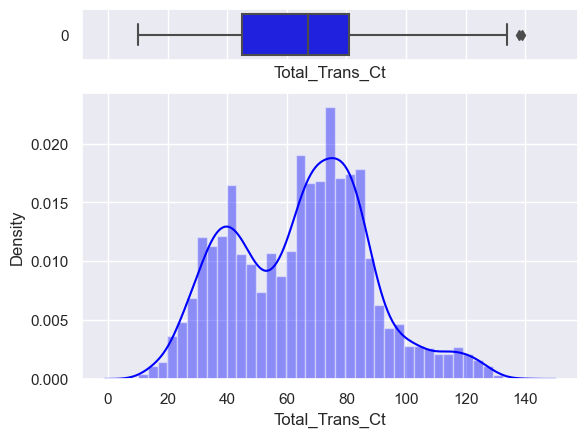

In [399]:
# this will cut the window in 2 parts
f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (.15, .85)})
# Add a graph in each part
sns.boxplot(df_churn["Total_Trans_Ct"], ax=ax_box, orient="h", color="blue")
sns.distplot(df_churn["Total_Trans_Ct"], ax=ax_hist, color="blue")
ax_box.set(xlabel='Total_Trans_Ct')
plt.show();

* The distribution of Total_Trans_Ct shows two peaks on 40 and 80 transactions in a year which indicates that customers used credit cards 3 to 6 times a month to make transactions.

### Total_Amt_Chng_Q4_Q1

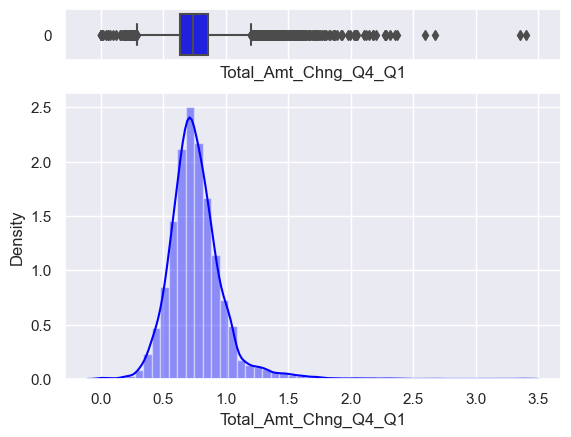

In [400]:
# this will cut the window in 2 parts
f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (.15, .85)})
# Add a graph in each part
sns.boxplot(df_churn["Total_Amt_Chng_Q4_Q1"], ax=ax_box, orient="h", color="blue")
sns.distplot(df_churn["Total_Amt_Chng_Q4_Q1"], ax=ax_hist, color="blue")
ax_box.set(xlabel='Total_Amt_Chng_Q4_Q1')
plt.show();

* The distribution of Total_Amt_Chng_Q4_Q1 looks normally distributed but there's a slight skew towards the right.
* From the boxplot, we can see that there are outliers on both sides of the whiskers.

### Total_Trans_Amt

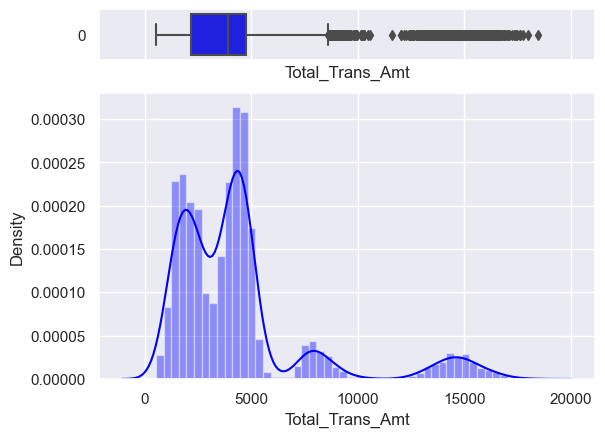

In [401]:
# this will cut the window in 2 parts
f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (.15, .85)})
# Add a graph in each part
sns.boxplot(df_churn["Total_Trans_Amt"], ax=ax_box, orient="h", color="blue")
sns.distplot(df_churn["Total_Trans_Amt"], ax=ax_hist, color="blue")
ax_box.set(xlabel='Total_Trans_Amt')
plt.show();

* The distribution of Total_Trans_Amt is skewed to the right.
* There are two peaks in data at total transaction amounts of one around 2500 and the second around the mean value of ~4500.
* From the boxplot, we can see that there are outliers - customers with more than ~8000 total transaction amounts are being considered as outliers.
* It would be interesting to check if the customers spending less with the card are the ones churning or the ones spending more are churning, if the latter is the case then there is a problem for the bank as it is losing valuable customers.

### Total_Ct_Chng_Q4_Q1

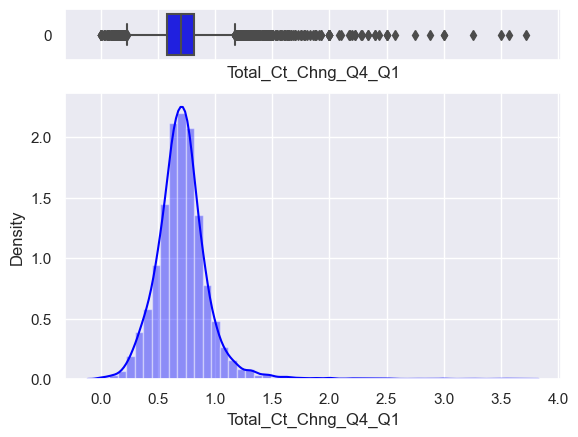

In [402]:
# this will cut the window in 2 parts
f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (.15, .85)})
# Add a graph in each part
sns.boxplot(df_churn["Total_Ct_Chng_Q4_Q1"], ax=ax_box, orient="h", color="blue")
sns.distplot(df_churn["Total_Ct_Chng_Q4_Q1"], ax=ax_hist, color="blue")
ax_box.set(xlabel='Total_Ct_Chng_Q4_Q1')
plt.show();

* The distribution of Total_Ct_Chng_Q4_Q1 looks normally distributed but there's a slight skew towards the right.
* From the boxplot, we can see that there are outliers on both sides of the whiskers.

### Avg_Utilization_Ratio

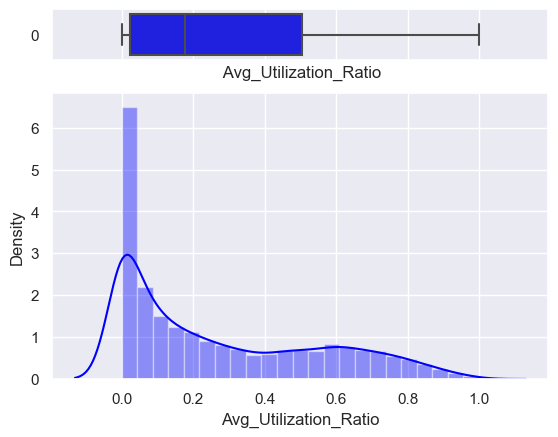

In [403]:
# this will cut the window in 2 parts
f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (.15, .85)})
# Add a graph in each part
sns.boxplot(df_churn["Avg_Utilization_Ratio"], ax=ax_box, orient="h", color="blue")
sns.distplot(df_churn["Avg_Utilization_Ratio"], ax=ax_hist, color="blue")
ax_box.set(xlabel=' Avg_Utilization_Ratio')
plt.show();

* The distribution of Avg_Utilization_Ratio is skewed to the right.
* This distribution is not a positive sign for the bank as most of the customers are not utilizing their credit amount.

**Credit limit, Average open to buy and Average utilization ratio are right-skewed**

1. Open to buy means how much credit a customer is left with
   * Low values of Open to buy could represent either
       * Customers have low credit limits
       * Customers are spending a lot so they are left less open to buy
       

2. Average utilization ratio = (1 - (open to buy/credit limit))
   * Low values of the Average utilization ratio represents
        * (Open to buy/credit limit) is nearly equal to 1 -> Open to buy is nearly equal to the credit limit -> customers are spending less using their credit cards

3. Credit limit is also right-skewed which represents - most of the customers have low credit limits
 

Looking at the 3 variables, we can conclude that most of the customers have low credit limits and are not utilizing their credit cards much

Now this statement justifies the right skewness for all 3 variables

## Bivariate Analysis

Let's look at the correlation of the variables

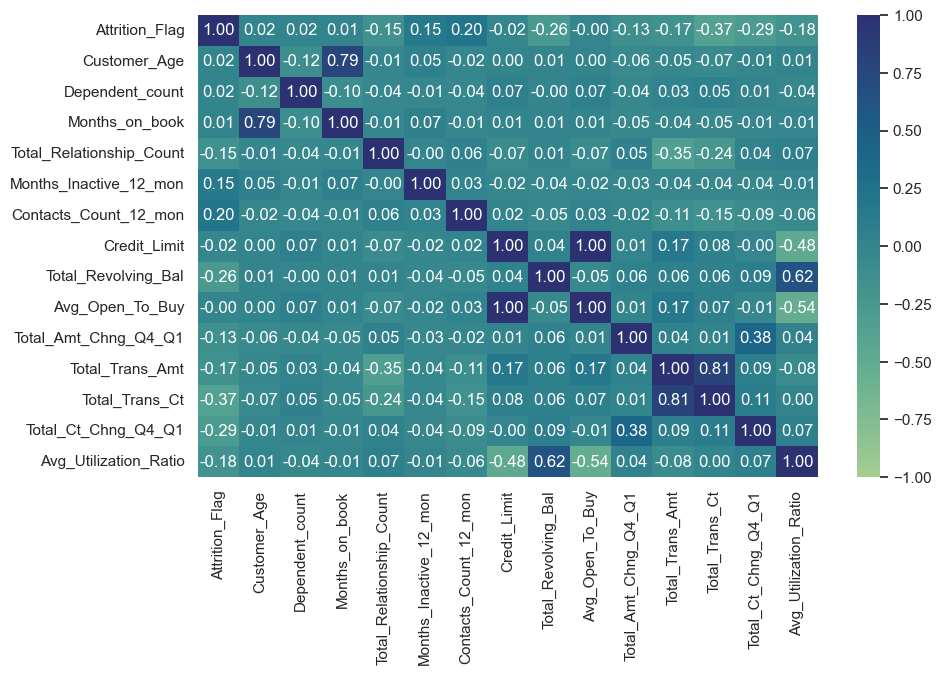

In [404]:
# fitting the figure size
plt.figure(figsize=(10, 6))
# plotting a heatmap to see the correlation of the variables
sns.heatmap(df_churn.corr(), annot=True, vmin=-1, vmax=1,fmt=".2f",  cmap="crest")
plt.show();

* Attrition_Flag shows a bit of a negative correlation with Total_Trans_Ct (total transactions) and Total_Trans_Amt (total transaction amount).
* There's a strong positive correlation between Months_on_book and Customer_Age, Total_Revolving_Bal and Avg_Utilization_Ratio, Total_Trans_Amt and Total_Trans_Ct.
* There's a negative correlation of Total_Relationship_count with Total_Trans_Amt and Total_Trans_Ct, Avg_Utilization_Ratio with Credit_Limit and Avg_Open_To_Buy.

In [405]:
# Columns to look into against the Attrition_Flage
new_cols= ['Gender','Marital_Status','Education_Level','Income_Category','Card_Category','Contacts_Count_12_mon', 'Months_Inactive_12_mon',
            'Total_Relationship_Count','Dependent_count']

### Attrition_Flag vs Gender

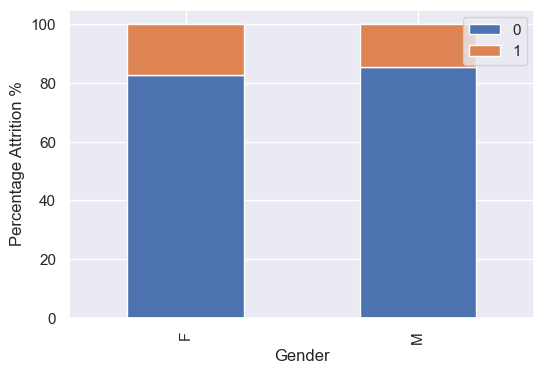

In [406]:
# plotting the percentage Attrition_Flag in respect to Gender
(pd.crosstab(df_churn['Gender'],df_churn['Attrition_Flag'],normalize='index')*100).plot(kind='bar',figsize=(6,4),stacked=True)
plt.ylabel('Percentage Attrition %')
plt.legend(loc="upper right")
plt.show();

* There is no much difference in attrition percentages for Males and Females.
* ~20% of both Males and Females attrite.

### Attrition_Flag vs Marital_Status

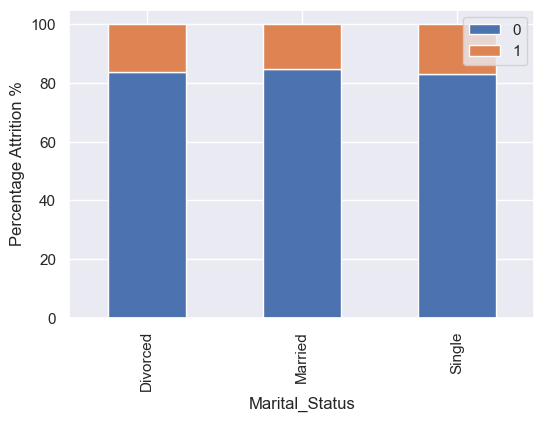

In [407]:
# plotting the percentage Attrition_Flag in respect to Marital_Status
(pd.crosstab(df_churn['Marital_Status'],df_churn['Attrition_Flag'],normalize='index')*100).plot(kind='bar',figsize=(6,4),stacked=True)
plt.ylabel('Percentage Attrition %')
plt.legend(loc="upper right")
plt.show();

### Attrition_Flag vs Education_Level

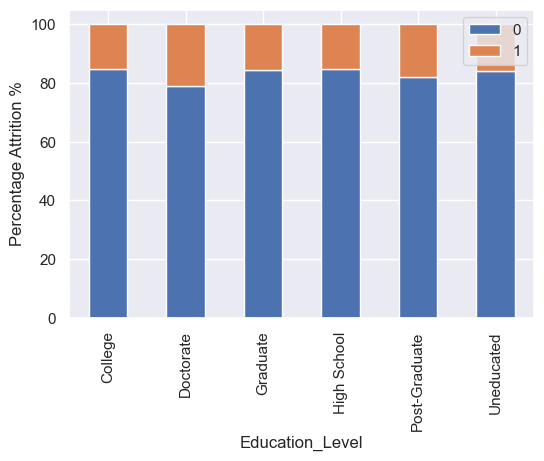

In [408]:
# plotting the percentage Attrition_Flag in respect to Educational_Level
(pd.crosstab(df_churn['Education_Level'],df_churn['Attrition_Flag'],normalize='index')*100).plot(kind='bar',figsize=(6,4),stacked=True)
plt.ylabel('Percentage Attrition %')
plt.legend(loc="upper right")
plt.show();

* Customers with higher education -  Doctorates and Post Graduates are the ones most(~20% for both education levels) attriting.

### Attrition_Flag vs Income_Category

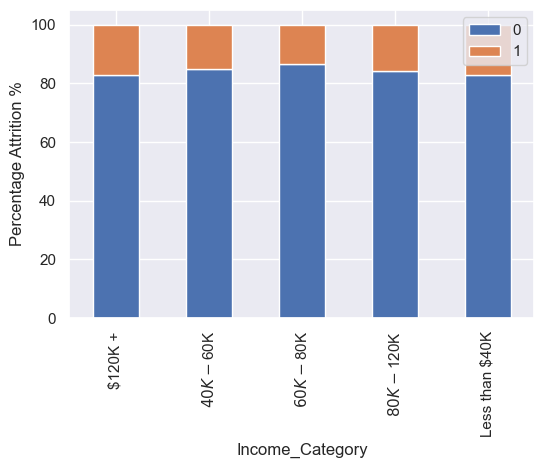

In [409]:
# plotting the percentage Attrition_Flag in respect to Educational_Level
(pd.crosstab(df_churn['Income_Category'],df_churn['Attrition_Flag'],normalize='index')*100).plot(kind='bar',figsize=(6,4),stacked=True)
plt.ylabel('Percentage Attrition %')
plt.legend(loc="upper right")
plt.show();

* The customers from two extreme income groups - Earning less than 40K and Earning more than 120k+ are the ones attriting the most.

### Attrition_Flag vs Card_Category

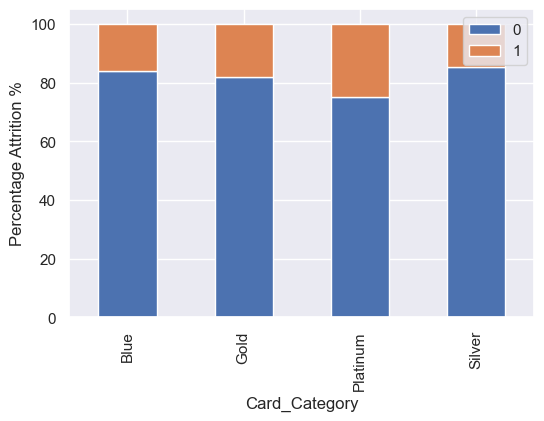

In [410]:
# plotting the percentage Attrition_Flag in respect to Card_Category
(pd.crosstab(df_churn['Card_Category'],df_churn['Attrition_Flag'],normalize='index')*100).plot(kind='bar',figsize=(6,4),stacked=True)
plt.ylabel('Percentage Attrition %')
plt.legend(loc="upper right")
plt.show();

* ~35% of attrition is amongst the customers with platinum cards followed by ~30% attrition in Gold cards.
* Customers with Platinum and Gold cards are our premium customers and the highest attrition for these customers is alarming as they are using the premium card provided by the bank.

### Attrition_Flag vs Contacts_Count_12_mon

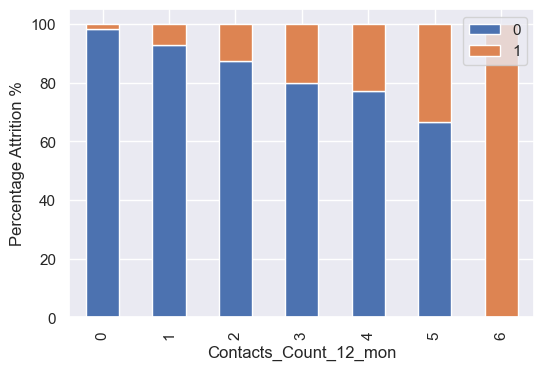

In [411]:
# plotting the percentage Attrition_Flag in respect to Contacts_Count_12_mon
(pd.crosstab(df_churn['Contacts_Count_12_mon'],df_churn['Attrition_Flag'],normalize='index')*100).plot(kind='bar',figsize=(6,4),stacked=True)
plt.ylabel('Percentage Attrition %')
plt.legend(loc="upper right")
plt.show();

* Highest attrition is among the customers who interacted the most with the bank.
* This signifies that the bank is not able to resolve the problems faced by customers leading to attrition
* A preliminary step to identify attriting customers would be to look out for customers who have reached out to them repeatedly.

### Attrition_Flag vs Months_Inactive_12_mon

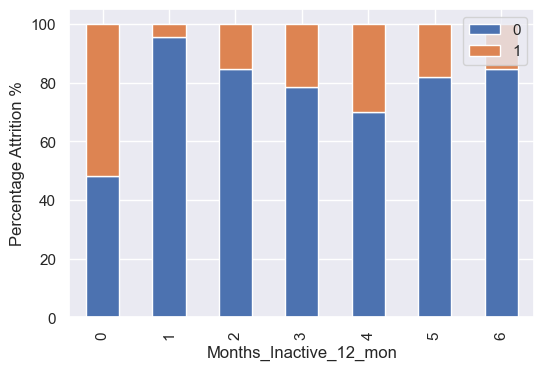

In [412]:
# plotting the percentage Attrition_Flag in respect to Months_Inactive_12_mon
(pd.crosstab(df_churn['Months_Inactive_12_mon'],df_churn['Attrition_Flag'],normalize='index')*100).plot(kind='bar',figsize=(6,4),stacked=True)
plt.ylabel('Percentage Attrition %')
plt.legend(loc="upper right")
plt.show();

* As inactivity increases attrition also increases (2-4 months)
* The interpretation from here for 0 months and 6 months is difficult as customers who recently used the card attrited the most while those who were inactive for 6 months attrited less.

### Attrition_Flag vs Total_Relationship_Count

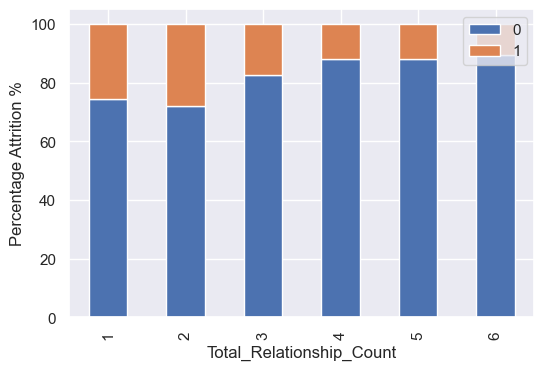

In [413]:
# plotting the percentage Attrition_Flag in respect to Total_Relationship_Count
(pd.crosstab(df_churn['Total_Relationship_Count'],df_churn['Attrition_Flag'],normalize='index')*100).plot(kind='bar',figsize=(6,4),stacked=True)
plt.ylabel('Percentage Attrition %')
plt.legend(loc="upper right")
plt.show();

* Attrition is highest among the customers who are using 1 or 2 products offered by the bank - together they constitute ~55% of the attrition.
* Customers who use more than 3 products are the ones least attriting, such customers might be more financially stable and actively invest in different services provided by the bank.

### Attrition_Flag vs Dependent_count

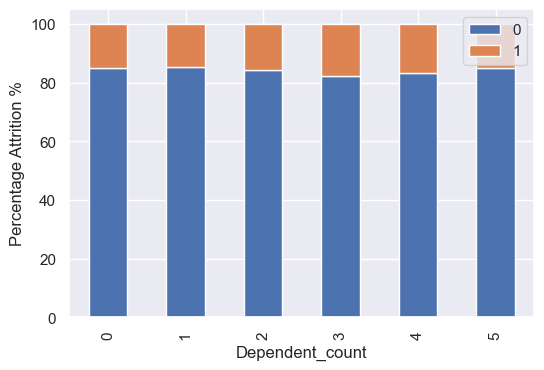

In [414]:
# plotting the percentage Attrition_Flag in respect to Dependent_count
(pd.crosstab(df_churn['Dependent_count'],df_churn['Attrition_Flag'],normalize='index')*100).plot(kind='bar',figsize=(6,4),stacked=True)
plt.ylabel('Percentage Attrition %')
plt.legend(loc="upper right")
plt.show();

* More the number of dependents more is the attrition, more responsibilities might lead to financial instability in such customers.
* Attrition is fairly low for customers with 0 or 1 dependents.

### Checking the Outliers
We can find the percentage of outliers, in each column of the data, using IQR in order to see how much impact they have on the data.

In [415]:
# To find the 25th percentile and 75th percentile.
Q1 = df_churn.quantile(0.25)  
Q3 = df_churn.quantile(0.75)

# Inter-quantile Range (75th perentile - 25th percentile)
IQR = Q3 - Q1  

lower = (
    Q1 - 1.5 * IQR
) 
# Finding lower and upper bounds for all values. All values outside these bounds are outliers
upper = Q3 + 1.5 * IQR

In [416]:
# Getting the outliers(values below the lower and above the upper) and their percentages
(
    (df_churn.select_dtypes(include=["float64", "int64"]) < lower)
    | (df_churn.select_dtypes(include=["float64", "int64"]) > upper)
).sum() / len(df_churn) * 100

Attrition_Flag             16.06596
Customer_Age                0.01975
Dependent_count             0.00000
Months_on_book              3.81159
Total_Relationship_Count    0.00000
Months_Inactive_12_mon      3.26849
Contacts_Count_12_mon       6.21112
Credit_Limit                9.71660
Total_Revolving_Bal         0.00000
Avg_Open_To_Buy             9.50923
Total_Amt_Chng_Q4_Q1        3.91034
Total_Trans_Amt             8.84764
Total_Trans_Ct              0.01975
Total_Ct_Chng_Q4_Q1         3.89059
Avg_Utilization_Ratio       0.00000
dtype: float64

* After identifying outliers, we can decide whether to remove/treat them or not. It depends on one's approach, here we are not going to treat them as there will be outliers in real case scenario (in age, the total amount of transactions, number of transactions, etc) and we would want our model to learn the underlying pattern for such customers.

### Missing Values Imputation
- We will impute missing values in all 3 columns(Educational_Level, Marital_Status, and Income_Category) using mode

In [417]:
# checking for nan
df_churn.isna().sum()

Attrition_Flag                 0
Customer_Age                   0
Gender                         0
Dependent_count                0
Education_Level             1519
Marital_Status               749
Income_Category             1112
Card_Category                  0
Months_on_book                 0
Total_Relationship_Count       0
Months_Inactive_12_mon         0
Contacts_Count_12_mon          0
Credit_Limit                   0
Total_Revolving_Bal            0
Avg_Open_To_Buy                0
Total_Amt_Chng_Q4_Q1           0
Total_Trans_Amt                0
Total_Trans_Ct                 0
Total_Ct_Chng_Q4_Q1            0
Avg_Utilization_Ratio          0
dtype: int64

We will use Mode as an ideal strategy in SimpleImputer to fit in the Nan values 

In [418]:
# defining SimpleImputer as imputer
imputer = SimpleImputer(strategy="most_frequent")

In [419]:
# Extracting the needed columns
col_for_impute = ["Education_Level", "Marital_Status", "Income_Category"]

In [420]:
# Fit and transform the df_churn data
df_churn[col_for_impute] = imputer.fit_transform(df_churn[col_for_impute])


In [421]:
# checking for nan
df_churn.isna().sum()

Attrition_Flag              0
Customer_Age                0
Gender                      0
Dependent_count             0
Education_Level             0
Marital_Status              0
Income_Category             0
Card_Category               0
Months_on_book              0
Total_Relationship_Count    0
Months_Inactive_12_mon      0
Contacts_Count_12_mon       0
Credit_Limit                0
Total_Revolving_Bal         0
Avg_Open_To_Buy             0
Total_Amt_Chng_Q4_Q1        0
Total_Trans_Amt             0
Total_Trans_Ct              0
Total_Ct_Chng_Q4_Q1         0
Avg_Utilization_Ratio       0
dtype: int64

* All missing values have been treated.

### Split Data

In [422]:
# Defining our features and target as X and y respectively
target = "Attrition_Flag"
X = df_churn.drop(columns=target)
y = df_churn[target]

In [423]:
# splitting the data with train_test_split in the ratio of 7:3 and setting the random state to 42
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42

)

print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)

X_train shape: (7088, 19)
y_train shape: (7088,)
X_test shape: (3039, 19)
y_test shape: (3039,)


### Encoding categorical variables


In [424]:
# using get_dummies to encode the X_train and X_test
X_train = pd.get_dummies(X_train, drop_first=True)
X_test = pd.get_dummies(X_test, drop_first=True)
print(X_train.shape, X_test.shape)

(7088, 29) (3039, 29)


* After encoding there are 29 columns.

In [425]:
# Taking a look at the X_train
X_train.head()

,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Gender_M,Education_Level_Doctorate,Education_Level_Graduate,Education_Level_High School,Education_Level_Post-Graduate,Education_Level_Uneducated,Marital_Status_Married,Marital_Status_Single,Income_Category_$40K - $60K,Income_Category_$60K - $80K,Income_Category_$80K - $120K,Income_Category_Less than $40K,Card_Category_Gold,Card_Category_Platinum,Card_Category_Silver
415,49,2,38,3,2,0,8077.00000,1965,6112.00000,0.63700,1329,26,0.44400,0.24300,1,0,0,0,1,0,1,0,0,1,0,0,0,0,0
3749,61,0,51,4,2,2,8476.00000,0,8476.00000,0.67500,3889,67,0.48900,0.00000,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0
9295,27,0,19,1,1,3,34516.00000,1131,33385.00000,0.71500,14716,112,0.75000,0.03300,1,0,0,0,0,0,1,0,0,0,1,0,0,0,1
8290,52,1,36,1,1,3,3040.00000,2517,523.00000,0.77400,4608,61,1.03300,0.82800,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0
7672,44,3,36,2,3,3,2228.00000,0,2228.00000,0.68600,2523,45,0.60700,0.00000,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0


## Building the model

## Model evaluation criterion

### Model can make wrong predictions as:
1. Predicting a customer will attrite and the customer doesn't attrite
2. Predicting a customer will not attrite and the customer attrites

### Which case is more important? 
* Predicting that customer will not attrite but he attrites i.e. losing on a valuable customer or asset. 

### How to reduce this loss i.e need to reduce False Negatives?
* Bank would want `Recall` to be maximized, greater the Recall higher the chances of minimizing false negatives. Hence, the focus should be on increasing Recall or minimizing the false negatives or in other words identifying the true positives(i.e. Class 1) so that the bank can retain their valuable customers by identifying the customers who are at risk of attrition.

**Also, let's create a function to calculate and print the classification report and confusion matrix so that we don't have to rewrite the same code repeatedly for each model.**

In [426]:
#creating metric function 
def metrics_score(actual, predicted):
    print(classification_report(actual, predicted))
    cm = confusion_matrix(actual, predicted)
    plt.figure(figsize=(5,3))
    sns.heatmap(cm, annot=True,  fmt='.2f', xticklabels=['Not Attrite', 'Attrite'], yticklabels=['Not Attrite', 'Attrite'], cmap="crest")
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.show();

**Checking model performance**

- The reported average includes the macro average which averages the unweighted mean per label, and the weighted average i.e. averaging the support-weighted mean per label.
- In classification, the class of interest is considered the positive class. Here, the class of interest is 1 i.e. identifying  the customers who are at risk of attrition.

**Reading the confusion matrix (clockwise):**

* True Negative (Actual=0, Predicted=0): Model predicts that a customer would not attrite and the customer does not attrite 

* False Positive (Actual=0, Predicted=1): Model predicts that a customer would attrite but the customer does not attrite

* False Negative (Actual=1, Predicted=0): Model predicts that a customer would not attrite but the customer attrites

* True Positive (Actual=1, Predicted=1): Model predicts that a customer would attrite and the customer actually attrites

In [427]:
# We can find our baseline accuracy for the models to train
acc_baseline = y_train.value_counts(normalize=True).max()
print("Baseline Accuracy:", round(acc_baseline, 4))

Baseline Accuracy: 0.8404


The baseline accurracy is approximately 84%

### Logistic Regression

In [428]:
# Build model
model_log=LogisticRegression()
#fitting logistic regression model
model_log.fit(X_train,y_train)

LogisticRegression()

In [429]:
# Cross validate model with Kfold stratified cross val
kfold = StratifiedKFold(n_splits=10)
kfold

StratifiedKFold(n_splits=10, random_state=None, shuffle=False)

In [430]:
# Logistic Regression Parameters tunning
LR = LogisticRegression( )
# Create regularization penalty space
penalty = ['l1', 'l2']
# Create regularization hyperparameter space
C = np.logspace(-2, 2, 100)
lr_param_grid = {'penalty': penalty, 'C': C }
clf = GridSearchCV(LogisticRegression(), lr_param_grid)
model_log = GridSearchCV(LR,param_grid = lr_param_grid, cv=kfold, scoring="accuracy", n_jobs= 4, verbose = 1)
model_log.fit(X_train,y_train)
LR_best = model_log.best_estimator_

# View best hyperparameters
print('Best Penalty:', LR_best.get_params()['penalty'])
print('Best C:', LR_best.get_params()['C'])

# Best score
model_log.best_score_

Fitting 10 folds for each of 200 candidates, totalling 2000 fits
Best Penalty: l2
Best C: 2.656087782946687


0.8892494003649606

              precision    recall  f1-score   support

           0       0.91      0.96      0.94      5957
           1       0.73      0.50      0.60      1131

    accuracy                           0.89      7088
   macro avg       0.82      0.73      0.77      7088
weighted avg       0.88      0.89      0.88      7088



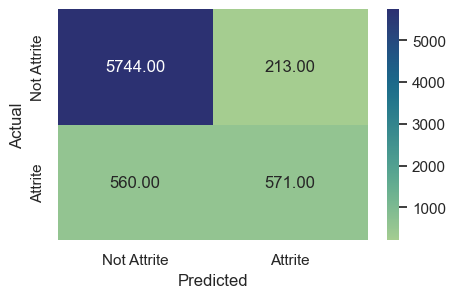

In [431]:
#checking the performance on the training data
y_pred_train_log = model_log.predict(X_train)
metrics_score(y_train, y_pred_train_log)

              precision    recall  f1-score   support

           0       0.90      0.97      0.93      2543
           1       0.72      0.45      0.56       496

    accuracy                           0.88      3039
   macro avg       0.81      0.71      0.74      3039
weighted avg       0.87      0.88      0.87      3039



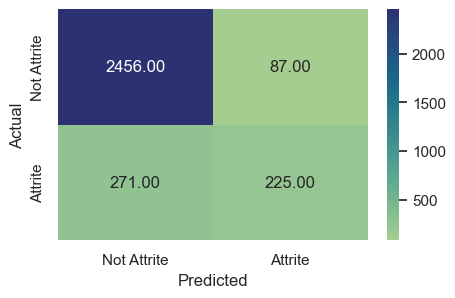

In [432]:
#checking the performance on the test dataset
y_pred_test_log = model_log.predict(X_test)
metrics_score(y_test, y_pred_test_log)

**Observations:**
- **We are getting an accuracy of around 90%** on train and test dataset.
- However, **the recall for this model is only around 50% for class 1 on train and 45% for test dataset.**
- As the recall is low, **this model will not perform well** in differentiating out those customers who have a high chance of leaving the bank, meaning it will eventually not help in reducing the attrition rate. 
- As we can see from the Confusion Matrix, **this model fails to identify the majority of customers who will attire.**

**Let's check the coefficients and find which variables are leading to attrition and which can help to reduce the attrition**

In [433]:
#printing the coefficients of logistic regression
cols=X_train.columns

coef_lg=model_log.best_estimator_.coef_

pd.DataFrame(coef_lg,columns=cols).T.sort_values(by=0,ascending=False)

,0
Contacts_Count_12_mon,0.62909
Months_Inactive_12_mon,0.51890
Dependent_count,0.31917
Income_Category_Less than $40K,0.11271
Marital_Status_Single,0.09458
Customer_Age,0.04896
Education_Level_Doctorate,0.02484
Education_Level_Graduate,0.02389
Education_Level_Post-Graduate,0.01416
Education_Level_Uneducated,0.00990


**Observations:**


**Features which positively affect on the attrition rate are:**
- Contacts_Count_12_mon
- Months_Inactive_12_mon
- Dependent_count
- Customer_Age
- Income_Category_Less than $40K	
- Education_Level_Graduate	
- Education_Level_Post-Graduate
- Education_Level_Doctorate
- Avg_Utilization_Ratio

**Features which negatively affect on the attrition rate are:**
- Total_Relationship_Count	
- Total_Trans_Ct
- Months_on_book
- Total_Ct_Chng_Q4_Q1
- Marital_Status_Married
- Income_Category_ 60𝐾− 80K
- Total_Amt_Chng_Q4_Q1


**Observations:**

- Based on the Logistic Regression model, **Contacts_Count_12_mon is the most important feature** in detecting whether an customer would attrite or not.So, highest attrition is among the customers who interacted the most with the bank.
This signifies that the bank is not able to resolve the problems faced by customers leading to attrition
- **This model also suggests that attrition is dependent on the customers's activity.** As inactivity increases attrition also increases.
- **Dependent_count is an important variable in predicting the attrition rate.** As more the number of dependents more is the attrition, more responsibilities might lead to financial instability in such customers.
- Education level of customers also have some interesting outcome.Customers with higher education - Doctorates and Post Graduates are the ones most attriting.
- *The customers belonging to the income group - Earning less than 40K are the ones attriting the most.
- Other features which appear to affect the chances of attrition are Maritial Status,Avg Utilization ratio.

- The model also captures the **inverse relation between Total_Relationship_Count and attrition** - suggesting customer who uses more number of products from the bank are the ones least attriting, such customers might be more financially stable and actively invest in different services provided by the bank.
-  **Customers who are doing more transactions with the bank have lower chance of attrition**, a conclusion that makes sense since Less number of transactions lead to higher attrition.
- From Total_Ct_Chng_Q4_Q1 and Total_Amt_Chng_Q4_Q1 it's clear that Customers who didn't attrite showed less variability across Q4 to Q1 as compared to the ones who attrited.

The coefficients of the logistic regression model give us the log of odds, which is hard to interpret in the real world. We can convert the log of odds into real odds by taking its exponential.

In [434]:
 #finding the odds
odds = np.exp(model_log.best_estimator_.coef_[0])

# adding the odds to a dataframe and sorting the values
pd.DataFrame(odds, X_train.columns, columns=['odds']).sort_values(by='odds', ascending=False)

,odds
Contacts_Count_12_mon,1.87590
Months_Inactive_12_mon,1.68017
Dependent_count,1.37598
Income_Category_Less than $40K,1.11930
Marital_Status_Single,1.09920
Customer_Age,1.05018
Education_Level_Doctorate,1.02515
Education_Level_Graduate,1.02418
Education_Level_Post-Graduate,1.01427
Education_Level_Uneducated,1.00995


**Observations**
- The odds of a customers contacting with the bank more to attrite are **1.9 times** the odds of one who is not, probably due to the fact that the bank is not able to resolve the problems faced by customers leading to attrition.
- The odds of a customer being inactive to attrite are **1.7 times** the odds of a customer who is actively in touch with bank.
- The odds of a customer with more dependent attriting are **1.4 times** the odds of a customer with less or no dependent.

**Precision-Recall Curve for logistic regression**

**Precision-Recall curves summarize the trade-off between the true positive rate and the positive predictive value for a predictive model using different probability thresholds.**

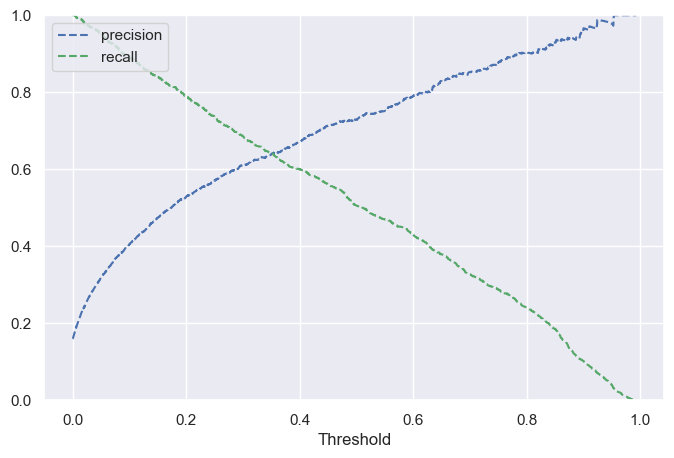

In [435]:
#predict_proba gives the probability of each observation belonging to each class
y_scores_lg=model_log.predict_proba(X_train) 


precisions_lg, recalls_lg, thresholds_lg = precision_recall_curve(y_train, y_scores_lg[:,1])

#Plot values of precisions, recalls, and thresholds
plt.figure(figsize=(8,5))
plt.plot(thresholds_lg, precisions_lg[:-1], 'b--', label='precision')
plt.plot(thresholds_lg, recalls_lg[:-1], 'g--', label = 'recall')
plt.xlabel('Threshold')
plt.legend(loc='upper left')
plt.ylim([0,1])
plt.show();

In [436]:
#calculating the exact threshold where precision and recall are equal.
for i in np.arange(len(thresholds_lg)):
    if precisions_lg[i]==recalls_lg[i]:
        print(thresholds_lg[i])

0.35201914257376526


**Observation:**
- We can see that precision and recall are balanced for a threshold of about ~**0.35**.

**Let's find out the performance of the model at this threshold**

              precision    recall  f1-score   support

           0       0.93      0.93      0.93      5957
           1       0.64      0.64      0.64      1131

    accuracy                           0.89      7088
   macro avg       0.79      0.79      0.79      7088
weighted avg       0.89      0.89      0.89      7088



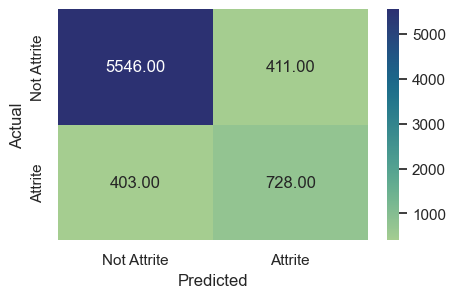

In [437]:
optimal_threshold1=.35
y_pred_train_log = model_log.predict_proba(X_train)
metrics_score(y_train, y_pred_train_log[:,1]>optimal_threshold1)

**Observations**
- **The model performance has improved. The recall has increased significantly for class 1.**
- Let's check the performance on the test data.

              precision    recall  f1-score   support

           0       0.93      0.93      0.93      2543
           1       0.65      0.62      0.64       496

    accuracy                           0.88      3039
   macro avg       0.79      0.78      0.78      3039
weighted avg       0.88      0.88      0.88      3039



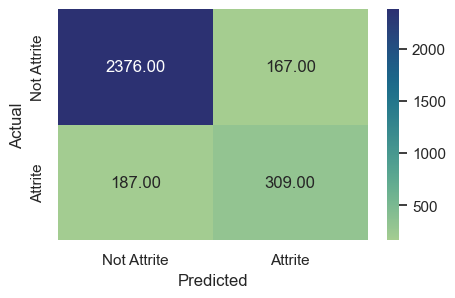

In [438]:
optimal_threshold1=.35
y_pred_test_log = model_log.predict_proba(X_test)
metrics_score(y_test, y_pred_test_log[:,1]>optimal_threshold1)

**Observation:**
- The model is giving **similar performance on the test and train data** i.e. the model is giving a generalized performance.
- **The recall of the test data has increased significantly** while at the same time, the precision has decreased slightly, which is to be expected while adjusting the threshold.
- The average recall and precision for the model are good but let's see if we can get better performance using other algorithms. 

### Naive Bayes

In [439]:
# Create a pipeline for feature selection, scaling, and classification
pipeline = Pipeline([
    ('select', SelectKBest(f_classif)),
    ('scale', StandardScaler()),
    ('classify', GaussianNB())
])

# Define the hyperparameters for grid search
parameters = {
    'select__k': [2, 3],
    'classify__var_smoothing': [1e-9, 1e-8, 1e-7]
}

# Perform grid search to find the best hyperparameters
grid_search = GridSearchCV(pipeline, parameters)
grid_search.fit(X_train, y_train)

# Print the best hyperparameters and their corresponding score
print("Best parameters:", grid_search.best_params_)
print("Best score:", grid_search.best_score_)

# Train the Naive Bayes classifier on the training data using bagging
model_nvb = BaggingClassifier(base_estimator=GaussianNB(var_smoothing=1e-9), n_estimators=10)
model_nvb.fit(X_train, y_train)
model_nvb

Best parameters: {'classify__var_smoothing': 1e-09, 'select__k': 3}
Best score: 0.887415754494338


BaggingClassifier(base_estimator=GaussianNB())

              precision    recall  f1-score   support

           0       0.93      0.95      0.94      5957
           1       0.70      0.65      0.67      1131

    accuracy                           0.90      7088
   macro avg       0.81      0.80      0.80      7088
weighted avg       0.90      0.90      0.90      7088



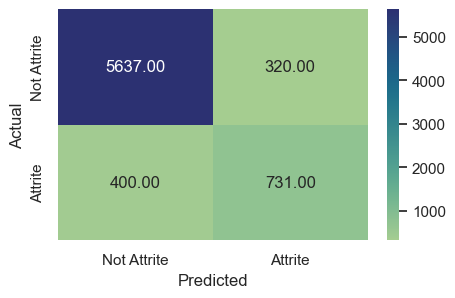

In [440]:
#checking the performance on the training data
y_pred_train_nvb = model_nvb.predict(X_train)
metrics_score(y_train, y_pred_train_nvb)

              precision    recall  f1-score   support

           0       0.92      0.95      0.93      2543
           1       0.67      0.57      0.62       496

    accuracy                           0.88      3039
   macro avg       0.80      0.76      0.78      3039
weighted avg       0.88      0.88      0.88      3039



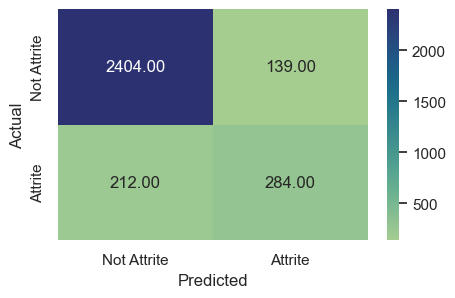

In [441]:
#checking the performance on the test dataset
y_pred_test_nvb = model_nvb.predict(X_test)
metrics_score(y_test, y_pred_test_nvb)

* Naive Bayes model is not overfitting as the accuracy is around 94% for both train and 92% for test dataset.
* Recall of class 1 for the model is only around 66% which implies our model may not correctly predict the customers who are likely to attrite. 
* The precision is quite good and the model may or may not help to find true positive.

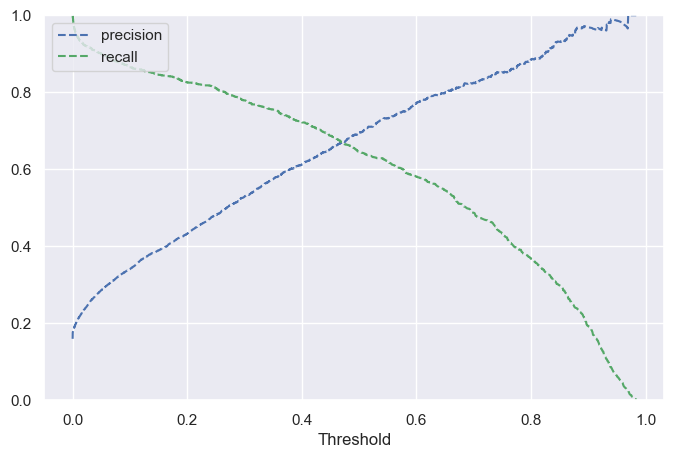

In [442]:
#predict_proba gives the probability of each observation belonging to each class
y_scores_nvb=model_nvb.predict_proba(X_train)


precisions_nvb, recalls_nvb, thresholds_nvb = precision_recall_curve(y_train, y_scores_nvb[:,1])

#Plot values of precisions, recalls, and thresholds
plt.figure(figsize=(8,5))
plt.plot(thresholds_nvb, precisions_nvb[:-1], 'b--', label='precision')
plt.plot(thresholds_nvb, recalls_nvb[:-1], 'g--', label = 'recall')
plt.xlabel('Threshold')
plt.legend(loc='upper left')
plt.ylim([0,1])
plt.show()

In [443]:
#calculating the exact threshold where precision and recall are equal.
for i in np.arange(len(thresholds_nvb)):
    if precisions_nvb[i]==recalls_nvb[i]:
        print(thresholds_nvb[i])

0.47037291785613194


              precision    recall  f1-score   support

           0       0.94      0.94      0.94      5957
           1       0.68      0.66      0.67      1131

    accuracy                           0.90      7088
   macro avg       0.81      0.80      0.80      7088
weighted avg       0.90      0.90      0.90      7088



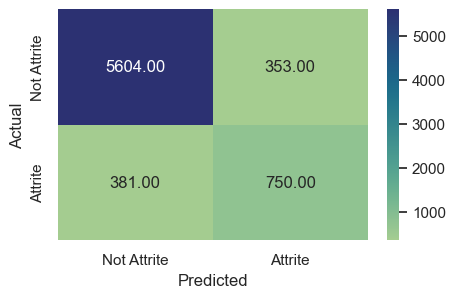

In [444]:
#checking the performance on the training data with the optimal threshold
optimal_threshold1=.48
y_pred_train_nvb = model_nvb.predict_proba(X_train)
metrics_score(y_train, y_pred_train_nvb[:,1]>optimal_threshold1)

              precision    recall  f1-score   support

           0       0.92      0.95      0.93      2543
           1       0.67      0.57      0.62       496

    accuracy                           0.88      3039
   macro avg       0.80      0.76      0.78      3039
weighted avg       0.88      0.88      0.88      3039



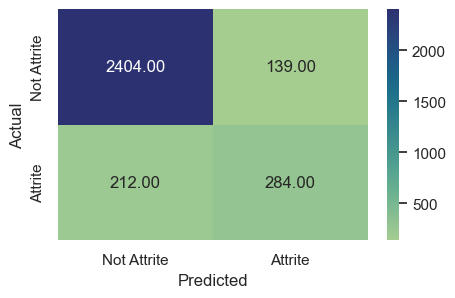

In [445]:
#checking the performance on the test dataset with the optimal threshold
y_pred_test_nvb = model_nvb.predict(X_test)
metrics_score(y_test, y_pred_test_nvb)

**Observation:**
- The Naive Bayes model is giving **close performance on the test and train data** i.e. the model is giving a generalized performance.
- **No significantly increases** with the metric scores, the precision has decreased slightly, which is to be expected while adjusting the threshold.
- The average recall and precision for the model are good but let's see if we can get better performance using other algorithms. 

### Decision Tree

In [446]:
# Create a DecisionTreeClassifier
model_dct= DecisionTreeClassifier(random_state=1,max_depth=8)
# Train the Naive Bayes classifier on the training data
model_dct.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=8, random_state=1)

              precision    recall  f1-score   support

           0       0.98      0.99      0.99      5957
           1       0.95      0.92      0.94      1131

    accuracy                           0.98      7088
   macro avg       0.97      0.96      0.96      7088
weighted avg       0.98      0.98      0.98      7088



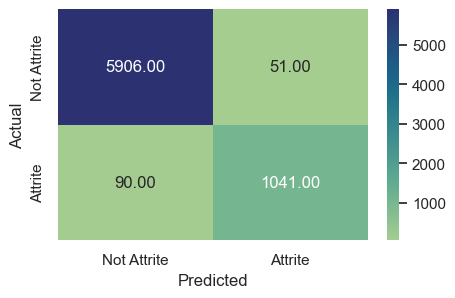

In [447]:
#checking the performance on the training data
pred_train_dct = model_dct.predict(X_train)
metrics_score(y_train, pred_train_dct)

* Almost 0 errors on the training set, each sample has been classified correctly.
* Model has performed very well on the training set.
* As we know a decision tree will continue to grow and classify each data point correctly if no restrictions are applied as the trees will learn all the patterns in the training set.
* Let's check the performance on test data to see if the model is overfitting.

              precision    recall  f1-score   support

           0       0.96      0.97      0.96      2543
           1       0.84      0.77      0.80       496

    accuracy                           0.94      3039
   macro avg       0.90      0.87      0.88      3039
weighted avg       0.94      0.94      0.94      3039



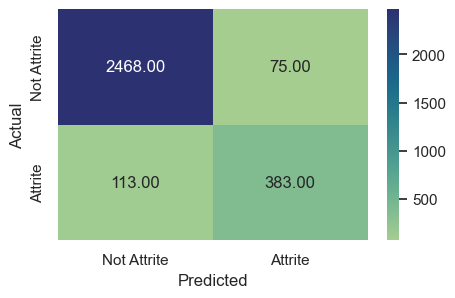

In [448]:
#checking the performance on the test dataset
pred_test_dct = model_dct.predict(X_test)
metrics_score(y_test, pred_test_dct)

* The decision tree model is slightly overfitting the data here.
* We can tune the hyperparameters to increase the performance and reduce overfitting.

We can use cross-validation and grid search to tune the hyperparameters and reduce overfitting

In [449]:
# Define the Decision Tree classifier and the hyperparameters to tune
dt = DecisionTreeClassifier(random_state=42)
parameters = {
    'max_depth': [None, 5, 10, 15, 20],
    'min_samples_split': [2, 5, 10, 15, 20],
    'min_samples_leaf': [1, 2, 5, 10, 15],
    'max_features': ['sqrt', 'log2', None]
}

# Perform grid search with cross-validation to find the best hyperparameters
grid_search = GridSearchCV(dt, parameters, cv=5)
grid_search.fit(X_train, y_train)

# Print the best hyperparameters and their corresponding score
print("Best parameters:", grid_search.best_params_)
print("Best score:", grid_search.best_score_)

# Train a new Decision Tree classifier using the best hyperparameters and evaluate its performance
model_dt = DecisionTreeClassifier(**grid_search.best_params_, random_state=42)
model_dt.fit(X_train, y_train)
model_dt

Best parameters: {'max_depth': 10, 'max_features': None, 'min_samples_leaf': 5, 'min_samples_split': 15}
Best score: 0.9444140414650631


DecisionTreeClassifier(max_depth=10, min_samples_leaf=5, min_samples_split=15,
                       random_state=42)

              precision    recall  f1-score   support

           0       0.98      0.99      0.98      5957
           1       0.94      0.88      0.91      1131

    accuracy                           0.97      7088
   macro avg       0.96      0.94      0.95      7088
weighted avg       0.97      0.97      0.97      7088



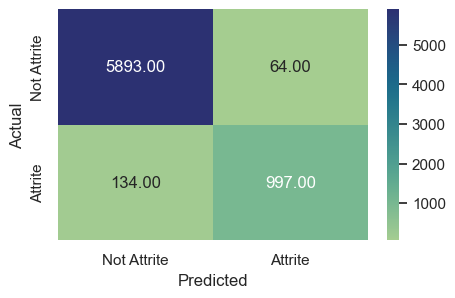

In [450]:
#checking the performance on the training data
pred_train_dt = model_dt.predict(X_train)
metrics_score(y_train, pred_train_dt)

* The model performance has improved 
* Let's check the performance on test data to see if the model is overfitting.

              precision    recall  f1-score   support

           0       0.95      0.97      0.96      2543
           1       0.84      0.76      0.80       496

    accuracy                           0.94      3039
   macro avg       0.90      0.87      0.88      3039
weighted avg       0.94      0.94      0.94      3039



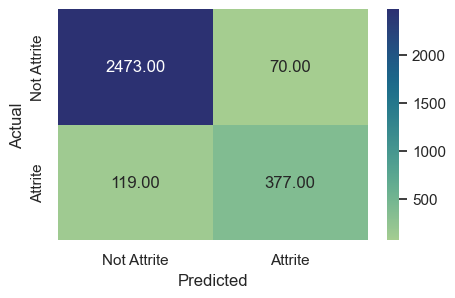

In [451]:
#checking the performance on the test dataset
pred_test_dt = model_dt.predict(X_test)
metrics_score(y_test, pred_test_dt)

* model_dt performed better by reducing the overfitting

We can visualize the decision tree and observe the decision rules

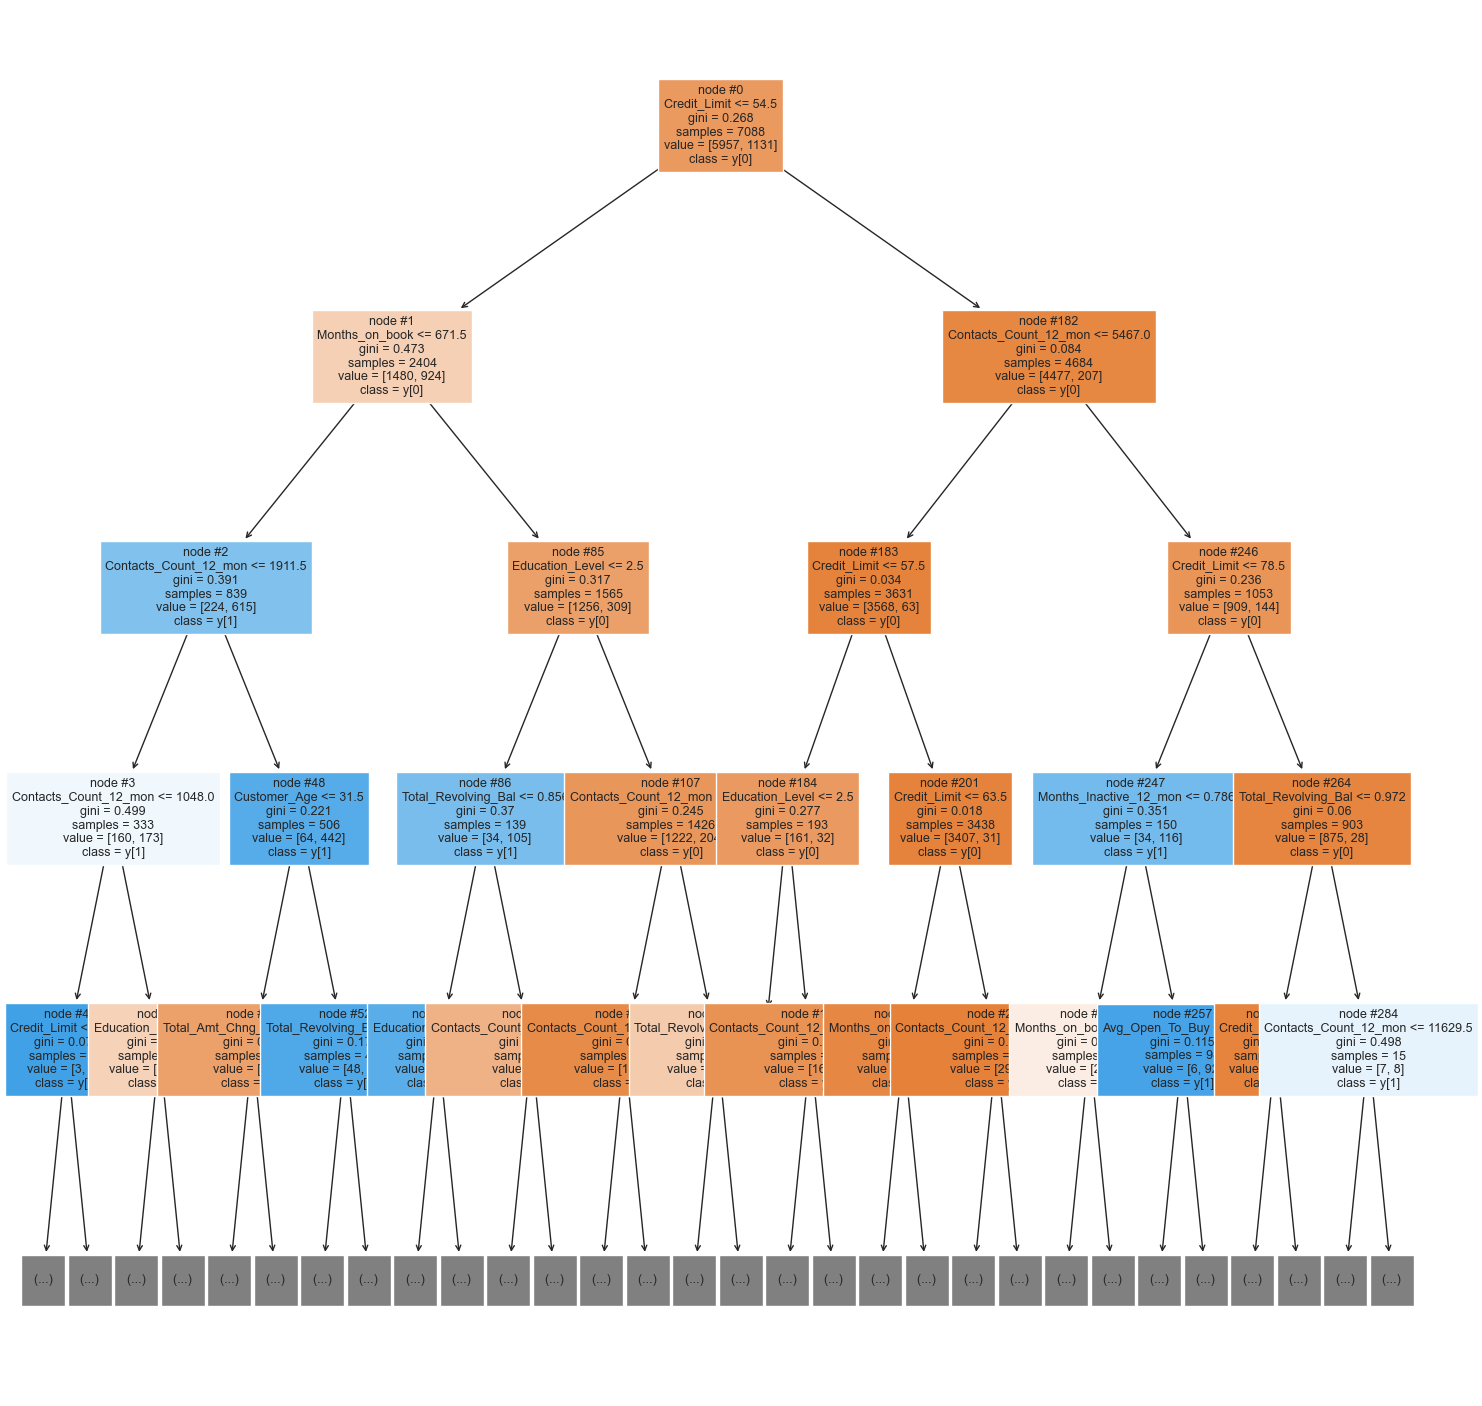

In [452]:
# put the feature in a list
features = list(X.columns)

plt.figure(figsize=(18,18))
from sklearn import tree
tree.plot_tree(model_dt,feature_names=features,max_depth =4, filled=True,fontsize=9,node_ids=True,class_names=True)
plt.show();

We can look at the feature importance and how their performances with model_dt from Decision Tree

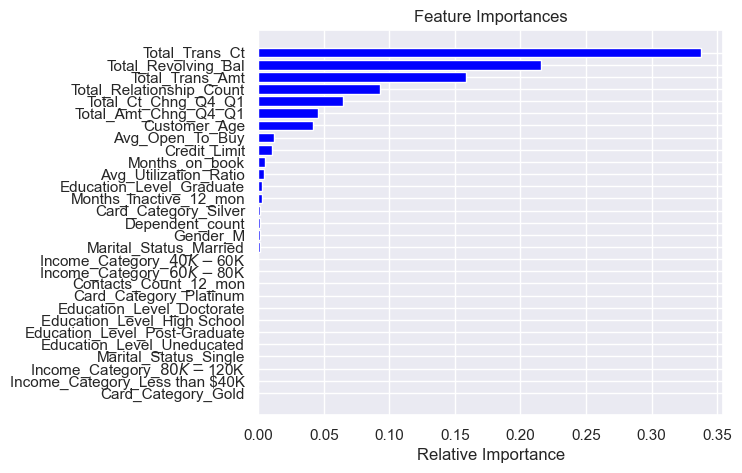

In [453]:
# importance of features in the tree building

feature_names = list(X_train.columns)
importances = model_dt.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(6, 5))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="blue", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

- **So,Total_Trans_Ct  is the most important feature** **followed by Total_Revolving_Bal and Total_Trans_Amt** which makes sense.Customers who are doing more transactions with the bank have lower chance of attrition.
- **Total_Ct_Chng_Q4_Q1, Total_Relationship_Count, Total_Amt_Chng_Q4_Q1 are also  important factors** .

### SVM

In [454]:
#To Speed-Up SVM
scaling = MinMaxScaler(feature_range=(-1,1)).fit(X_train)
X_train = scaling.transform(X_train)
X_test = scaling.transform(X_test)

In [455]:
#fitting SVM
svm = SVC(kernel = 'linear') #linear kernal or linear decision boundary
model_svm = svm.fit(X = X_train, y = y_train)

              precision    recall  f1-score   support

           0       0.92      0.97      0.95      5957
           1       0.78      0.57      0.66      1131

    accuracy                           0.91      7088
   macro avg       0.85      0.77      0.80      7088
weighted avg       0.90      0.91      0.90      7088



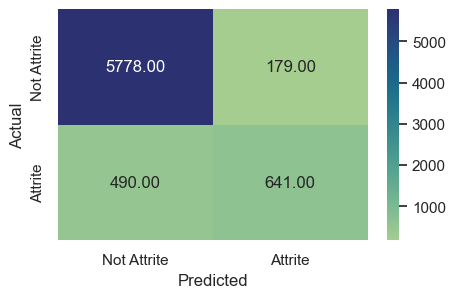

In [456]:
y_pred_train_svm = model_svm.predict(X_train)
metrics_score(y_train, y_pred_train_svm)

              precision    recall  f1-score   support

           0       0.91      0.97      0.94      2543
           1       0.79      0.51      0.62       496

    accuracy                           0.90      3039
   macro avg       0.85      0.74      0.78      3039
weighted avg       0.89      0.90      0.89      3039



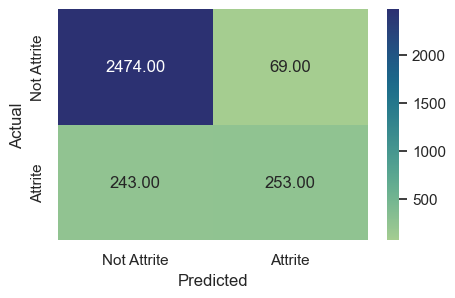

In [457]:
# Checking performance on the test data
y_pred_test_svm = model_svm.predict(X_test)
metrics_score(y_test, y_pred_test_svm)

* SVM model with rbf linear is not overfitting as the accuracy is around 90% for both train and test dataset.
* Recall of class 1 for the model is only around 55% which implies our model will not correctly predict the customers who are likely to attrite. 
* The precision is quite good and the model will help to find true positive and will save the cost and energy of the bank. 

In [458]:
#predict_proba gives the probability of each observation belonging to each class
svm_thre=SVC(probability=True)
svm_thre.fit(X_train,y_train)
y_scores_svm=svm_thre.predict_proba(X_train) 


precisions_svm, recalls_svm, thresholds_svm = precision_recall_curve(y_train, y_scores_svm[:,1])

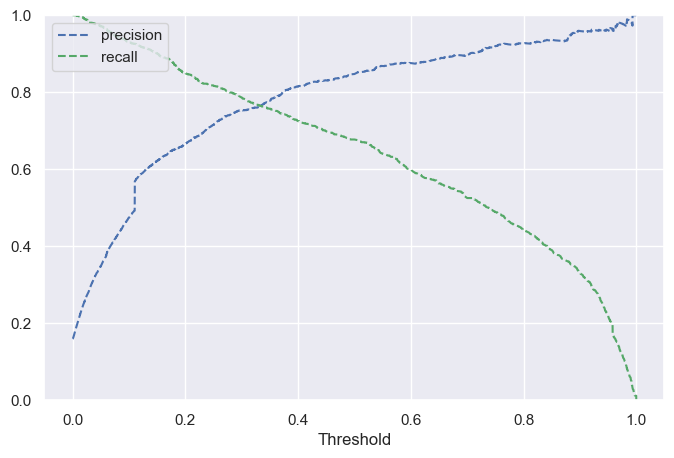

In [459]:
#Plot values of precisions, recalls, and thresholds
plt.figure(figsize=(8,5))
plt.plot(thresholds_svm, precisions_svm[:-1], 'b--', label='precision')
plt.plot(thresholds_svm, recalls_svm[:-1], 'g--', label = 'recall')
plt.xlabel('Threshold')
plt.legend(loc='upper left')
plt.ylim([0,1])
plt.show()

In [460]:
#calculating the exact threshold where precision and recall are equal.
for i in np.arange(len(thresholds_svm)):
    if precisions_svm[i]==recalls_svm[i]:
        print(thresholds_svm[i])

0.33348740322580317


              precision    recall  f1-score   support

           0       0.96      0.95      0.96      5957
           1       0.76      0.77      0.76      1131

    accuracy                           0.92      7088
   macro avg       0.86      0.86      0.86      7088
weighted avg       0.92      0.92      0.92      7088



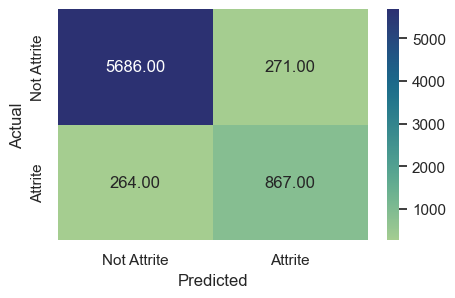

In [461]:
optimal_threshold1=0.33
y_pred_train_svm = svm_thre.predict_proba(X_train)
metrics_score(y_train, y_pred_train_svm[:,1]>optimal_threshold1)

              precision    recall  f1-score   support

           0       0.94      0.95      0.94      2543
           1       0.71      0.67      0.69       496

    accuracy                           0.90      3039
   macro avg       0.82      0.81      0.82      3039
weighted avg       0.90      0.90      0.90      3039



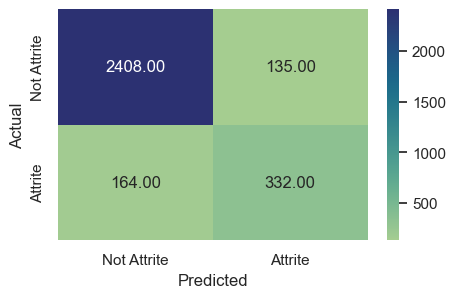

In [462]:
y_pred_test_svm = svm_thre.predict_proba(X_test)
metrics_score(y_test, y_pred_test_svm[:,1]>optimal_threshold1)

* At the optimal threshold of .33, the model performance has improved significantly. The recall has improved from 0.57 to .77 which is a ~20% increase and the model is giving good generalized results. 
* Moreover, the kernel used to create this is rbf, hence model is performing good with non-linear kernel.
* As the recall is good, **this model will perform well** in differentiating out those customers who have a high chance of leaving the bank, meaning it will eventually help in reducing the attrition rate. 

Justification of the models selected from the initial chart

In [466]:
# put the models in a list
models = list()
# append the models to the list 
models.append(LogisticRegression())
models.append(GaussianNB())
models.append(DecisionTreeClassifier())
models.append(SVC())

In [467]:
# declare empty lists
cv_results = []
cv_names = []

for model in models :
    # perform k-fold cross validation on each model and store the results
    cv_results.append(cross_val_score(model, X_train, y = y_train, scoring = "accuracy", cv = kfold, n_jobs=4))
    # store the name of each model
    cv_names.append(model.__class__.__name__)

# calculate the mean and standard deviation of the cross-validation results for each model
cv_means = []
cv_std = []
for cv_result in cv_results:
    cv_means.append(cv_result.mean())
    cv_std.append(cv_result.std())

In [473]:
cv_res

,CrossValMeans,CrossValerrors,Algorithm
0,0.90477,0.01232,LogisticRegression
1,0.87514,0.01269,GaussianNB
2,0.93496,0.00822,DecisionTreeClassifier
3,0.90632,0.01054,SVC


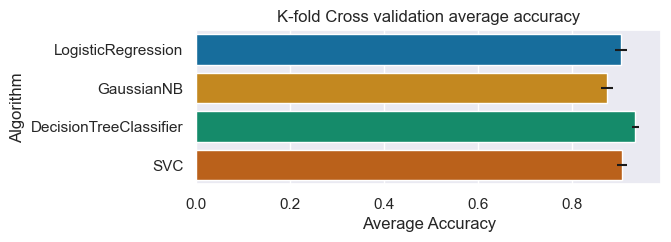

In [469]:
# create a pandas dataframe to store the cross-validation results
cv_res = pd.DataFrame({"CrossValMeans":cv_means,"CrossValerrors": cv_std,"Algorithm":cv_names})

# fitting the figure size
plt.figure(figsize=(6, 2))
# create a barplot to visualize the cross-validation results
g = sns.barplot(x="CrossValMeans",y="Algorithm",data = cv_res,orient = "h", palette="colorblind", **{'xerr':cv_std})
#deep, muted, bright, pastel, dark, colorblind
# set the x-axis label and plot title
g.set_xlabel("Average Accuracy")
g = g.set_title("K-fold Cross validation average accuracy")
plt.show();

**Observation:**

•	**Logistic Regression** and **GaussianNB** had an average accuracy/errors of 0.9048/0.01232 and 0.8751/0.1269 respectively. This shows that the GaussianNB have the least accuracy.

•	**DecisionTreeClassifier** and **SVC** had an average accuracy/errors of 0.9350/0.00822 and 0.9048/0.01232 respectively. DecisionTreeClassifier had the best performance. These models will perform well in differentiating out those customers who have high chances of leaving the bank, meaning it will eventually help in reducing the attrition rate.



## Some Business Recommendations

* We have been able to build a predictive model:

  a) that bank can deploy this model to identify customers who are at the risk of attrition.
  
  b) that the bank can use to find the key causes that drive attrition. 
  
  c) based on which bank can take appropriate actions to build better retention policies for customers.
  

* Factors that drive the attrition - Total_Trans_Ct, Total_Revolving_Bal, Total_Trans_Amt, Total_Relationship_Count
* Total_Trans_Ct: Less number of transactions in a year leads to attrition of a customer - to increase the usage of cards the bank can provide offers like cashback, special discounts on the purchase of something, etc so that customers feel motivated to use their cards.

* Total_Revolving_Bal: Customers with less total revolving balance are the ones who attrited, such customers must have cleared their dues and opted out of the credit card service. After the customer has cleared the dues bank can ask for feedback on their experience and get to the cause of attrition.

* Total_Trans_Amt: Less number of transactions can lead to less transaction amount and eventually leads to customer attrition - Bank can provide offers on the purchase of costlier items which in turn will benefit the customers and bank both.

* Total_Relationship_Count: Attrition is highest among the customers who are using 1 or 2 products offered by the bank - together they constitute ~55% of the attrition - Bank should investigate here to find the problems customers are facing with these products, customer support, or more transparency can help in retaining customers.

* Female customers should be the target customers for any kind of marketing campaign as they are the ones who utilize their credits, make more and higher amount transactions. But their credit limit is less so increasing the credit limit for such customers can profit the bank.

* Months_Inactive: As inactivity increases the attrition also increases, 2-4 months of inactivity are the biggest contributors of attrition -Bank can send automated messages to engage customers, these messages can be about their monthly activity, new offers or services, etc.

* Highest attrition is among the customers who interacted/reached out the most with/to the bank, This indicates that the bank is not able to resolve the problems faced by customers leading to attrition - a feedback collection system can be set up to check if the customers are satisfied with the resolution provided, if not, the bank should act upon it accordingly.